## Data representation

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the dataset
edges = []
with open("twitter_combined.txt", "r") as file:
    for line in file:
        source, target = line.strip().split()
        edges.append((int(source), int(target)))

In [5]:
edges

[(214328887, 34428380),
 (17116707, 28465635),
 (380580781, 18996905),
 (221036078, 153460275),
 (107830991, 17868918),
 (151338729, 222261763),
 (19705747, 34428380),
 (222261763, 88323281),
 (19933035, 149538028),
 (158419434, 17434613),
 (149538028, 153226312),
 (364971269, 153226312),
 (100581193, 279787626),
 (113058991, 69592091),
 (151338729, 187773078),
 (406628822, 262802533),
 (460282402, 88323281),
 (280935165, 437804658),
 (222261763, 27633075),
 (285312927, 151338729),
 (279787626, 131613362),
 (158419434, 17675120),
 (394263193, 100581193),
 (254839786, 88323281),
 (204317520, 21548772),
 (67864340, 172883064),
 (270449528, 297801196),
 (153226312, 187773078),
 (67864340, 8088112),
 (153226312, 17116707),
 (394263193, 14925700),
 (124528830, 307458983),
 (204317520, 160237722),
 (220368467, 54228724),
 (206923844, 103598216),
 (153226312, 380580781),
 (207594668, 21146135),
 (451250774, 314316607),
 (6581292, 314316607),
 (34428380, 31331740),
 (196327549, 225444667),
 (2

In [6]:
# Step 2: Create a graph representation
graph = nx.Graph()
graph.add_edges_from(edges)


In [7]:
# Step 3: Plot a subset of the graph
subset_nodes = list(graph.nodes)[:1000]  # Select the first 1000 nodes for visualization

subset_graph = graph.subgraph(subset_nodes)

In [8]:
# Use Circular layout for better performance with large graphs
pos = nx.spring_layout(subset_graph)

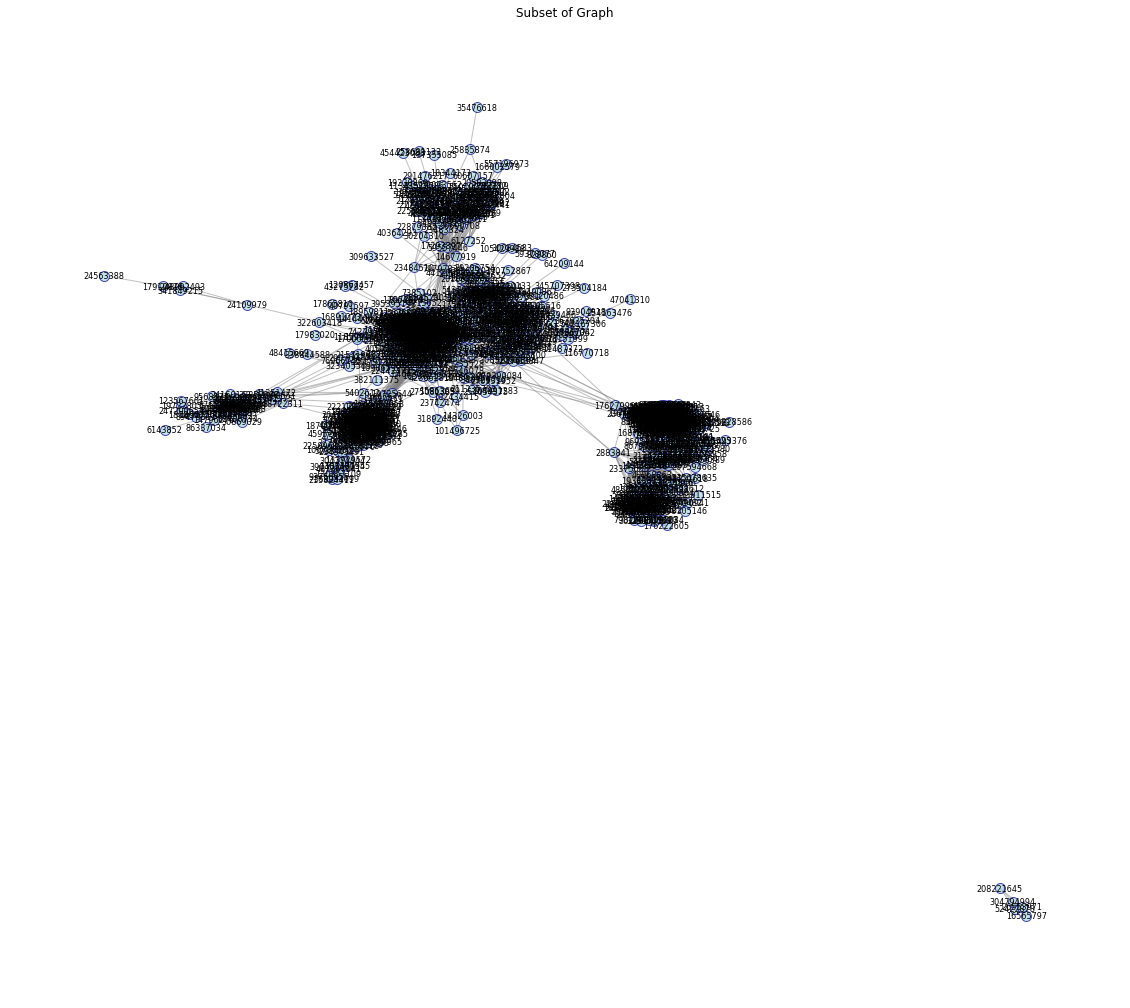

In [9]:
plt.figure(figsize=(20, 18))

# Draw nodes with custom style
nx.draw_networkx_nodes(subset_graph, pos, node_color='lightblue', node_size=100, alpha=0.7, edgecolors='darkblue')

# Draw edges with custom style
nx.draw_networkx_edges(subset_graph, pos, width=1.0, alpha=0.5, edge_color='gray')

# Draw labels for nodes
nx.draw_networkx_labels(subset_graph, pos, font_size=8, font_color='black')

plt.axis('off')
plt.title('Subset of Graph')
plt.show()

## Clustering phase 

### Data preprocessing

In [10]:
import numpy as np
from scipy.sparse import lil_matrix

edges = edges[:1000]

# Get the number of nodes
nodes = set()

for edge in edges:
    nodes.add(edge[0])
    nodes.add(edge[1])
num_nodes = len(nodes)

# Create a dictionary to map node IDs to indices
node_to_index = {node: index for index, node in enumerate(nodes)}

# Create the adjacency matrix (sparse)
adjacency_matrix = lil_matrix((num_nodes, num_nodes), dtype=np.int8)
for edge in edges:
    source, target = edge
    source_index = node_to_index[source]
    target_index = node_to_index[target]
    adjacency_matrix[source_index, target_index] = 1
    #adjacency_matrix[target_index, source_index] = 1

# Convert to a compressed sparse row (CSR) matrix for efficient computations
adjacency_matrix = adjacency_matrix.tocsr()


In [11]:
element = adjacency_matrix[1, 1]
print(element)


0


In [12]:
adjacency_matrix.shape

(212, 212)

### Model Training 

In [13]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Create an instance of SpectralClustering
model = SpectralClustering(n_clusters=5, affinity='precomputed')

# Fit the model using the adjacency matrix
clusters = model.fit_predict(adjacency_matrix)

# Calculate the Silhouette score
silhouette = silhouette_score(adjacency_matrix, clusters)

# Print the assigned cluster labels and Silhouette score
print("Cluster Labels:", clusters)
print("Silhouette Score:", silhouette)

Cluster Labels: [1 0 0 3 0 0 2 1 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 3 4 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 4
 0 0 0 0 0 0 0 0 0 4 4 0 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0]
Silhouette Score: -0.2994999598613327


/home/yassine/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:234: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/home/yassine/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


# Constructing the DataFrame

In [14]:
import glob
import os

featurenames = []

directory = "twitter/"  # Replace with the actual path to your directory

# Construct the file pattern to match
pattern = os.path.join(directory, "*.featnames")

# Get a list of filenames that match the pattern
filenames = glob.glob(pattern)

# Print the filenames
for filename in filenames:
    file_path = filename  # Replace with the actual path to your file

    # Open the file in read mode
    with open(file_path, "r") as file:
        # Read the entire contents of the file
        file_contents = file.readlines()
    for line in file_contents:
        starting_index = line.find(" ")
        ending_index = line.find('\n')
        featurenames.append(line[starting_index+1:ending_index])
featurenames = list(set(featurenames))

In [15]:
featurenames

['#VenusExpress',
 '@yaiagift:',
 '@Squirtz24',
 '@dex3108',
 '@x_Lily',
 '#mongodb',
 '@AshleyAnnsArmy:',
 '#Xboxlive',
 '@gamehelmet:',
 '@lllxNEOxlll',
 '@xxxsinkyxxx:',
 '@NPowerNW:',
 '@paramore"',
 '@Maddendisaster',
 '@22Makeupbybee:',
 '@excusemewwe',
 '#Syfy.',
 '@babsdraws',
 '@realmadrid:',
 '@MillStephano,',
 '@rklipman',
 '@mcbshows',
 '@npazvelasco',
 '@SimplyKirstyL',
 '@unclegrambo',
 '@loverspaatz:',
 '@Versus_H2O:',
 '@ddddddeon:',
 '@sawaboof',
 '@Ferdzzz',
 '@erikachristakis',
 '@BarrySanders',
 '@LydiaBreakfast',
 '@velascop:',
 '@MassLtGov:',
 '@madinachloe',
 '@rjcombo:',
 '#ellies',
 '@ChrisDca',
 '@crismulder',
 '@happymerz',
 '@KandiiKissr',
 '@OMG_IBeTrollin',
 '#glassy',
 '@risukosasakama:',
 '#veganism',
 '@dogboner:',
 '@twitter_es:',
 '@AmazingRed1:',
 '@DanielBoulud',
 '#saturday',
 '@ShareConference',
 '@HuskRestaurant',
 '#stmeal',
 '@trouty:',
 '@ECDIOhio',
 '@pain_of_rainbow',
 '@_1GarotaMimada:',
 '@rootlabs',
 '@GreatOrmondSt?',
 '@densho',
 '@linu

In [16]:
len(featurenames)

216839

In [17]:
featurenames[:3]

['#VenusExpress', '@yaiagift:', '@Squirtz24']

In [18]:
directory = "twitter/"  # Replace with the actual path to your directory

# Construct the file pattern to match
pattern = os.path.join(directory, "*.featnames")

# Get a list of filenames that match the pattern
filenames = glob.glob(pattern)

nodeIds = []
for filename in filenames:
    starting_index = filename.find("/")+1
    ending_index = filename.find(".")
    nodeIds.append(int(filename[starting_index:ending_index]))


In [19]:
len(nodeIds)

973

In [20]:
nodeIds[:3]

[207594668, 111374622, 96483973]

In [21]:
hm = {}
for nodeId in nodeIds:
    file_path_featnames = "twitter/"+str(nodeId)+".featnames"
    file_path_egofeat = "twitter/"+str(nodeId)+".egofeat"  
    
    # Open the file in read mode
    with open(file_path_egofeat, "r") as file:
        # Read the entire contents of the file
        egofeat = file.read().split()
        
    with open(file_path_featnames, "r") as file:
        # Read the entire contents of the file
        featnames_raw = file.readlines()

    index_ones = [ index for index,char in enumerate(egofeat) if char =='1' ]
    
    featurenames1=[]    
    for line in featnames_raw:
        starting_index = line.find(" ")
        ending_index = line.find('\n')
        featurenames1.append(line[starting_index+1:ending_index])    
    
    for index in index_ones:
        featurename = featurenames1[index]
        if featurename not in hm:
            hm[featurename]=[]
            hm[featurename].append(nodeId)
        else:
            hm[featurename].append(nodeId)
hm

{'#OCTAVIA': [207594668],
 '#THEHELP': [207594668],
 '#ff': [207594668,
  37723441,
  98633794,
  48730516,
  242013901,
  18068719,
  353767514,
  21222922,
  93006320,
  65357070,
  15647676,
  73298877,
  160237722,
  52405864,
  21420959,
  19898730,
  143344048,
  124474025,
  16987303,
  117671022,
  745823,
  52330027,
  107511013,
  17561785,
  87004822,
  14528221],
 '@BAFTA': [207594668],
 '@FuckYesEmma': [207594668],
 '@JUDAOcombr': [207594668],
 '@astowellcom': [207594668],
 '@emmastonebr': [207594668],
 '@helpmovie': [207594668],
 '@igorbenhuy': [207594668],
 '@jessicabielorg': [207594668],
 '@katyperry:': [207594668, 31457243, 358845982, 789071],
 '@octaviaspencer:': [207594668],
 '#BrothersToTheEnd': [111374622],
 '#drunktweet': [111374622],
 '#gears3': [111374622, 289738351],
 '#gearsweekend': [111374622],
 '#nerdgasm': [111374622],
 '@FINALLEVEL': [111374622, 382110320, 129093262],
 '@GearsViking': [111374622, 289738351, 5774432, 155976326, 53685618],
 '@Kaylila': [111

In [22]:
import pandas as pd

df = pd.DataFrame(columns = ["nodeId"]+list(hm.keys()))

In [23]:
df

,nodeId,#OCTAVIA,#THEHELP,#ff,@BAFTA,@FuckYesEmma,@JUDAOcombr,@astowellcom,@emmastonebr,@helpmovie,...,@RPCC808,@Springfart:,@Telvanni_Mage,@chero666,@chococat,"@dannyBstyle,",@jon_blaze55,@kylepulver:,@terrycavanagh,@twitchtv.


In [24]:
df["nodeId"]=nodeIds

In [25]:
%%time
df = df.fillna(0)

CPU times: user 9.72 s, sys: 299 ms, total: 10 s
Wall time: 9.9 s


In [26]:
%%time
for item,value in hm.items():
    featurename = item
    nodes = value
    for node in nodes:
        df.loc[ df["nodeId"]==node ,featurename] = 1

CPU times: user 8.12 s, sys: 113 ms, total: 8.23 s
Wall time: 8.06 s


In [27]:
df

,nodeId,#OCTAVIA,#THEHELP,#ff,@BAFTA,@FuckYesEmma,@JUDAOcombr,@astowellcom,@emmastonebr,@helpmovie,...,@RPCC808,@Springfart:,@Telvanni_Mage,@chero666,@chococat,"@dannyBstyle,",@jon_blaze55,@kylepulver:,@terrycavanagh,@twitchtv.
0,207594668,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,111374622,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96483973,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7875912,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14147754,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,14528221,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
969,14840869,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
970,82726142,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
971,255790981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
973*216840

210985320

In [31]:
df.to_csv("properties.csv",index=False)